<a href="https://colab.research.google.com/github/Heleinef/Data-Science-Master_Heleine/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required modules

In [73]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn.metrics import accuracy_score
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

# plotly or other graphing library"



# Importing and Loading the Iris Data Set

In [82]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()





# Question 1.
Return the first 5 rows of the data including the feature names as column headings in a DataFrame and,
separate Python list containing target names.

In [79]:

# Create a DataFrame for the features with column names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
df['target'] = iris.target

# Extract the target names
target_names = iris.target_names.tolist()

# Return the first 5 rows of the DataFrame and the target names list
first_5_rows = df.head()
first_5_rows, target_names


(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    target  
 0       0  
 1       0  
 2       0  
 3       0  
 4       0  ,
 ['setosa', 'versicolor', 'virginica'])

In [84]:
# Target names
target_names = iris.target_names

# Print results

print("\nTarget names:", target_names)


Target names: ['setosa' 'versicolor' 'virginica']


# Question 2
Fit the Iris dataset into a housing model with neighbors=5 and predict the category of observations passed in,
argument new_observations.
Return back the target names of each prediction (and not their encoded values,i.e. return setosa instead of 0).

In [70]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Split the Iris dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train a k-nearest neighbors classifier on the Iris dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the category of new observations (you can use any new observations)
new_observations = [[5.1, 3.5, 1.4, 0.2],  # Example: New observation 1
                    [6.9, 3.1, 5.1, 2.3],  # Example: New observation 2
                    [4.8, 3.0, 1.4, 0.3]]  # Example: New observation 3

predictions = knn.predict(new_observations)

# Map the encoded target values to their respective names
target_names = iris.target_names
predicted_categories = [target_names[prediction] for prediction in predictions]

print("Predicted categories for new observations:", predicted_categories)



Predicted categories for new observations: ['setosa', 'virginica', 'setosa']


# Question 3
* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.
        
* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors;

* Generate and return back an accuracy score using the test data that was split out

In [74]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_accuracy(split=0.2, neighbors=5):
    # Load the Iris dataset
    iris = load_iris()
    X_iris, y_iris = iris.data, iris.target

    # Split the Iris dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=split, random_state=42)

    # Train a k-nearest neighbors classifier on the training data
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example usage with default parameters (split=0.2, neighbors=5)
accuracy = knn_accuracy()
print("Accuracy score:", accuracy)


Accuracy score: 1.0


# Question 4
Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

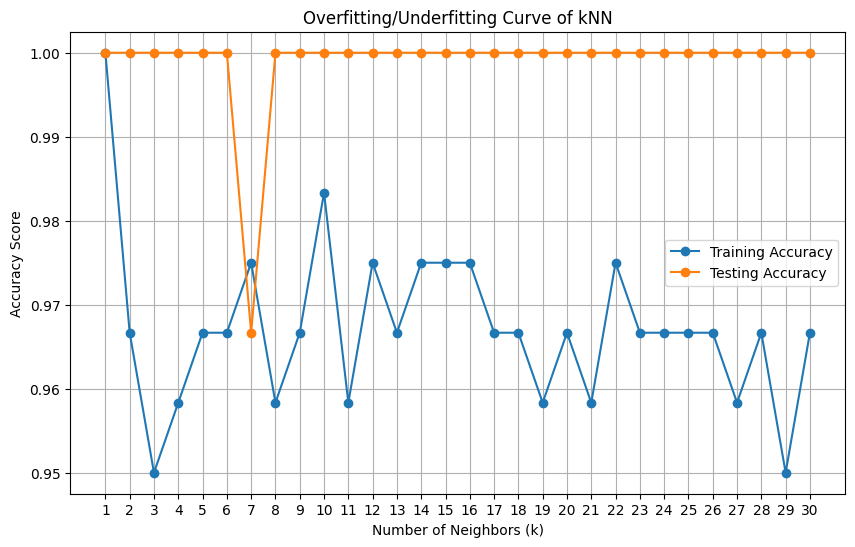

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_overfitting_underfitting_curve():
    # Load the Iris dataset
    iris = load_iris()
    X_iris, y_iris = iris.data, iris.target

    # Split the Iris dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

    # Initialize lists to store training and testing accuracy scores
    train_accuracy = []
    test_accuracy = []

    # Range of k values
    k_values = range(1, 31)

    # Iterate over different k values
    for k in k_values:
        # Train a k-nearest neighbors classifier on the training data
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Calculate the training accuracy
        train_pred = knn.predict(X_train)
        train_acc = accuracy_score(y_train, train_pred)
        train_accuracy.append(train_acc)

        # Calculate the testing accuracy
        test_pred = knn.predict(X_test)
        test_acc = accuracy_score(y_test, test_pred)
        test_accuracy.append(test_acc)

    # Plot the curves
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, train_accuracy, label='Training Accuracy', marker='o')
    plt.plot(k_values, test_accuracy, label='Testing Accuracy', marker='o')
    plt.title('Overfitting/Underfitting Curve of kNN')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy Score')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate and plot the overfitting/underfitting curve
knn_overfitting_underfitting_curve()
